In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
# style.use("ggplot")
import seaborn as sns

import os
import numpy as np
import glob

In [2]:
path = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'
files = glob.glob(path  + 'c*_Alltrials.csv')

In [3]:
files

['./dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-10_Alltrials.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-1_Alltrials.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-2_Alltrials.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-3_Alltrials.csv']

In [4]:
temp = pd.DataFrame(index = ['c-1', 'c-2', 'c-3', 'c-10'], columns = ['shape'])
test = pd.DataFrame(columns = ['c-1', 'c-2', 'c-3', 'c-10'])

In [5]:
data_df = pd.DataFrame(index = np.arange(0,25), columns = ['c-1', 'c-2', 'c-3', 'c-10'])
for file in files:
    df = pd.read_csv(file)
    flowername = os.path.basename(file)[:-14]
    temp = []
    for name,moth in df.groupby('name'):
        success = moth['DiscoveryTime'].count() / moth['trialNum'].count()
        temp.append(success)
    new_df = pd.Series([temp])    
    data_df.loc[0:len(temp)-1,flowername] = temp

In [6]:
data_df.head()

,c-1,c-2,c-3,c-10
0,0.909091,0.842105,1,0
1,1,0.894737,0.821429,0
2,0.909091,0.931034,0.673077,0.296875
3,0.882353,0.9375,0.607143,0.133333
4,0.925,0.857143,0.166667,0


In [7]:
bla = data_df.transpose()
bla['flower'] = bla.index
bla.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,flower
c-1,0.909091,1,0.909091,0.882353,0.925,0.8,1,0.961538,1,1,...,0.75,0.961538,0.903226,NaN,NaN,NaN,NaN,NaN,NaN,c-1
c-2,0.842105,0.894737,0.931034,0.9375,0.857143,0.833333,0.842105,0.9375,0.833333,0,...,0.8,1,0.692308,0.75,0.777778,NaN,NaN,NaN,NaN,c-2
c-3,1,0.821429,0.673077,0.607143,0.166667,0,0.916667,0.8,0.875,0,...,0.208333,0.892857,1,0.333333,1,0.9,0.619048,0.916667,NaN,c-3
c-10,0,0,0.296875,0.133333,0,0.2,0.3,0.0555556,0.25,0.227273,...,0.36,0.47619,0.37037,0,0.166667,0.375,NaN,NaN,NaN,c-10


In [8]:
new = pd.melt(bla,id_vars='flower',var_name='mothnumber', value_name='PercentageSuccess')
new.head()

,flower,mothnumber,PercentageSuccess
0,c-1,0,0.909091
1,c-2,0,0.842105
2,c-3,0,1
3,c-10,0,0
4,c-1,1,1


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


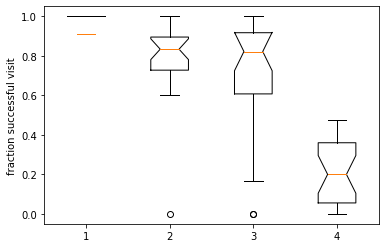

In [9]:
plt.boxplot(data_df.transpose(), 'o-')
plt.ylabel('fraction successful visit')
plt.savefig('./dataFolders/Output/Figures/v2/' + 'fractionSuccessful.png')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


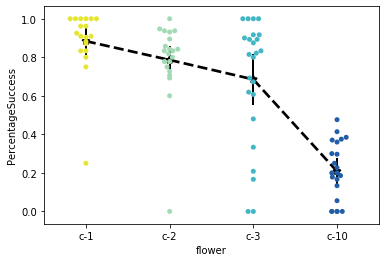

In [10]:
colorScheme = ['#e5e534', '#a1dab4', '#41b6c4', '#225ea8']

sns.pointplot(x = "flower", y = "PercentageSuccess", data = new, 
              color = 'k', errwidth = 2, linestyles = '--', markers = '*')
sns.swarmplot(x = "flower", y = "PercentageSuccess", data = new, palette = colorScheme)
plt.savefig('./dataFolders/Output/Figures/v2/testColorScheme/' + 'PercentageSuccesful.png')

In [83]:
import scipy.stats as stats
# import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [88]:
results = ols('PercentageSuccess ~ C(flower)', data=new).fit()


In [91]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

ValueError: shapes (86,51) and (86,51) not aligned: 51 (dim 1) != 86 (dim 0)